<a href="https://colab.research.google.com/github/christinabrnn/NYC-Taxi-Project/blob/main/Fair_Fare_A_Deep_Dive_into_Taxi_Price_Fluctuations_and_Congestion_Pricing_in_New_York_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fair Fare: A Deep Dive into Taxi Price Fluctuations and Congestion Pricing in New York City

Section: B1

Team Number: Team 3

Members: Jooyeon Lee, Jeonghee (Christina) Son, Crystal Leatvanich, Courtney Vincent

Date: February 12, 2025

## Proposal

Through this project, we hope to answer critical questions like fare equity across neighborhoods
and how location influences price fluctuations. Our analysis will dive into understanding how
pricing varies across the city, with a particular focus on the new congestion pricing zone. Using
unsupervised machine learning techniques such as dimensionality reduction, K-means,
hierarchical clustering, and anomaly detection we aim to uncover associations and patterns in the
data. By analyzing trip data, we will identify location-based pricing trends and detect areas
where fare increases are disproportionately high due to congestion pricing.
For example, we will assess whether certain areas experience higher price variability than others,
potentially highlighting regions where pricing structures could be adjusted for passengers. This
information could be useful for policymakers and transportation authorities in improving pricing
models, ensuring its fairness, and optimizing taxi operations across New York City.
This deeper dive into spatial patterns and pricing will provide insights not only into current fare
disparities but also into ways to improve the overall transparency and fairness of the city's taxi
fare system, ensuring it meets the needs of both passengers and operators.

## Exploratory Data Analysis (EDA)

### Data Source

[NYC Taxi Trip Data](https://data.cityofnewyork.us/Transportation/2023-Yellow-Taxi-Trip-Data/4b4i-vvec/about_data)

The dataset consists of trip records submitted by New York City's yello taxi Technology Service Providers, containing details such as pickup and drop-off dates/times, locations, distances and fares. Originally, it spanned around 38 million rows with a total size of 3.52 GB. However, due to its large size, we applied random sampling, reducing it to 200,000 rows with 19 columns for analysis.

In [32]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
taxi_data = pd.read_csv('/content/drive/MyDrive/BA820-Group Project/sampled_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Summary Statistics

In [33]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               200000 non-null  int64  
 1   tpep_pickup_datetime   200000 non-null  object 
 2   tpep_dropoff_datetime  200000 non-null  object 
 3   passenger_count        193101 non-null  float64
 4   trip_distance          200000 non-null  float64
 5   RatecodeID             193101 non-null  float64
 6   store_and_fwd_flag     193101 non-null  object 
 7   PULocationID           200000 non-null  int64  
 8   DOLocationID           200000 non-null  int64  
 9   payment_type           200000 non-null  int64  
 10  fare_amount            200000 non-null  float64
 11  extra                  200000 non-null  float64
 12  mta_tax                200000 non-null  float64
 13  tip_amount             200000 non-null  float64
 14  tolls_amount           200000 non-nu

In [34]:
num_columns = taxi_data.select_dtypes(include=['number'])
num_columns.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,200000.000000,193101.000000,200000.000000,193101.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,193101.000000,193101.000000
mean,1.738495,1.374866,4.785999,1.634005,165.369115,163.796390,1.184465,19.444202,1.554802,0.485714,3.507406,0.582085,0.979696,28.359865,2.266262,0.138672
std,0.444883,0.896346,304.341505,7.374074,63.925262,69.928236,0.554237,18.830230,1.831698,0.107858,4.033558,2.177846,0.197667,23.466912,0.795142,0.466193
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-500.000000,-7.500000,-0.500000,-22.200000,-27.550000,-1.000000,-451.000000,-2.500000,-1.750000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.950000,2.500000,0.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.410000,0.000000,1.000000,30.720000,2.500000,0.000000
max,6.000000,7.000000,119576.840000,99.000000,265.000000,265.000000,4.000000,637.900000,12.750000,0.800000,170.000000,132.040000,1.000000,656.150000,2.500000,1.750000


In [35]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,10/26/2023 06:47:26 PM,10/26/2023 07:11:34 PM,1.0,3.30,1.0,N,186,263,1,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0
1,2,08/29/2023 12:10:22 PM,08/29/2023 12:15:13 PM,1.0,0.82,1.0,N,234,170,1,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0
2,1,10/12/2023 08:51:29 AM,10/12/2023 08:57:07 AM,1.0,0.70,1.0,N,238,238,1,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0
3,2,09/14/2023 05:06:53 PM,09/14/2023 05:17:53 PM,1.0,0.30,1.0,N,48,50,1,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0
4,1,05/06/2023 02:11:12 PM,05/06/2023 02:16:21 PM,4.0,0.80,1.0,N,229,233,2,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6899
trip_distance               0
RatecodeID               6899
store_and_fwd_flag       6899
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6899
airport_fee              6899
dtype: int64


<Axes: >

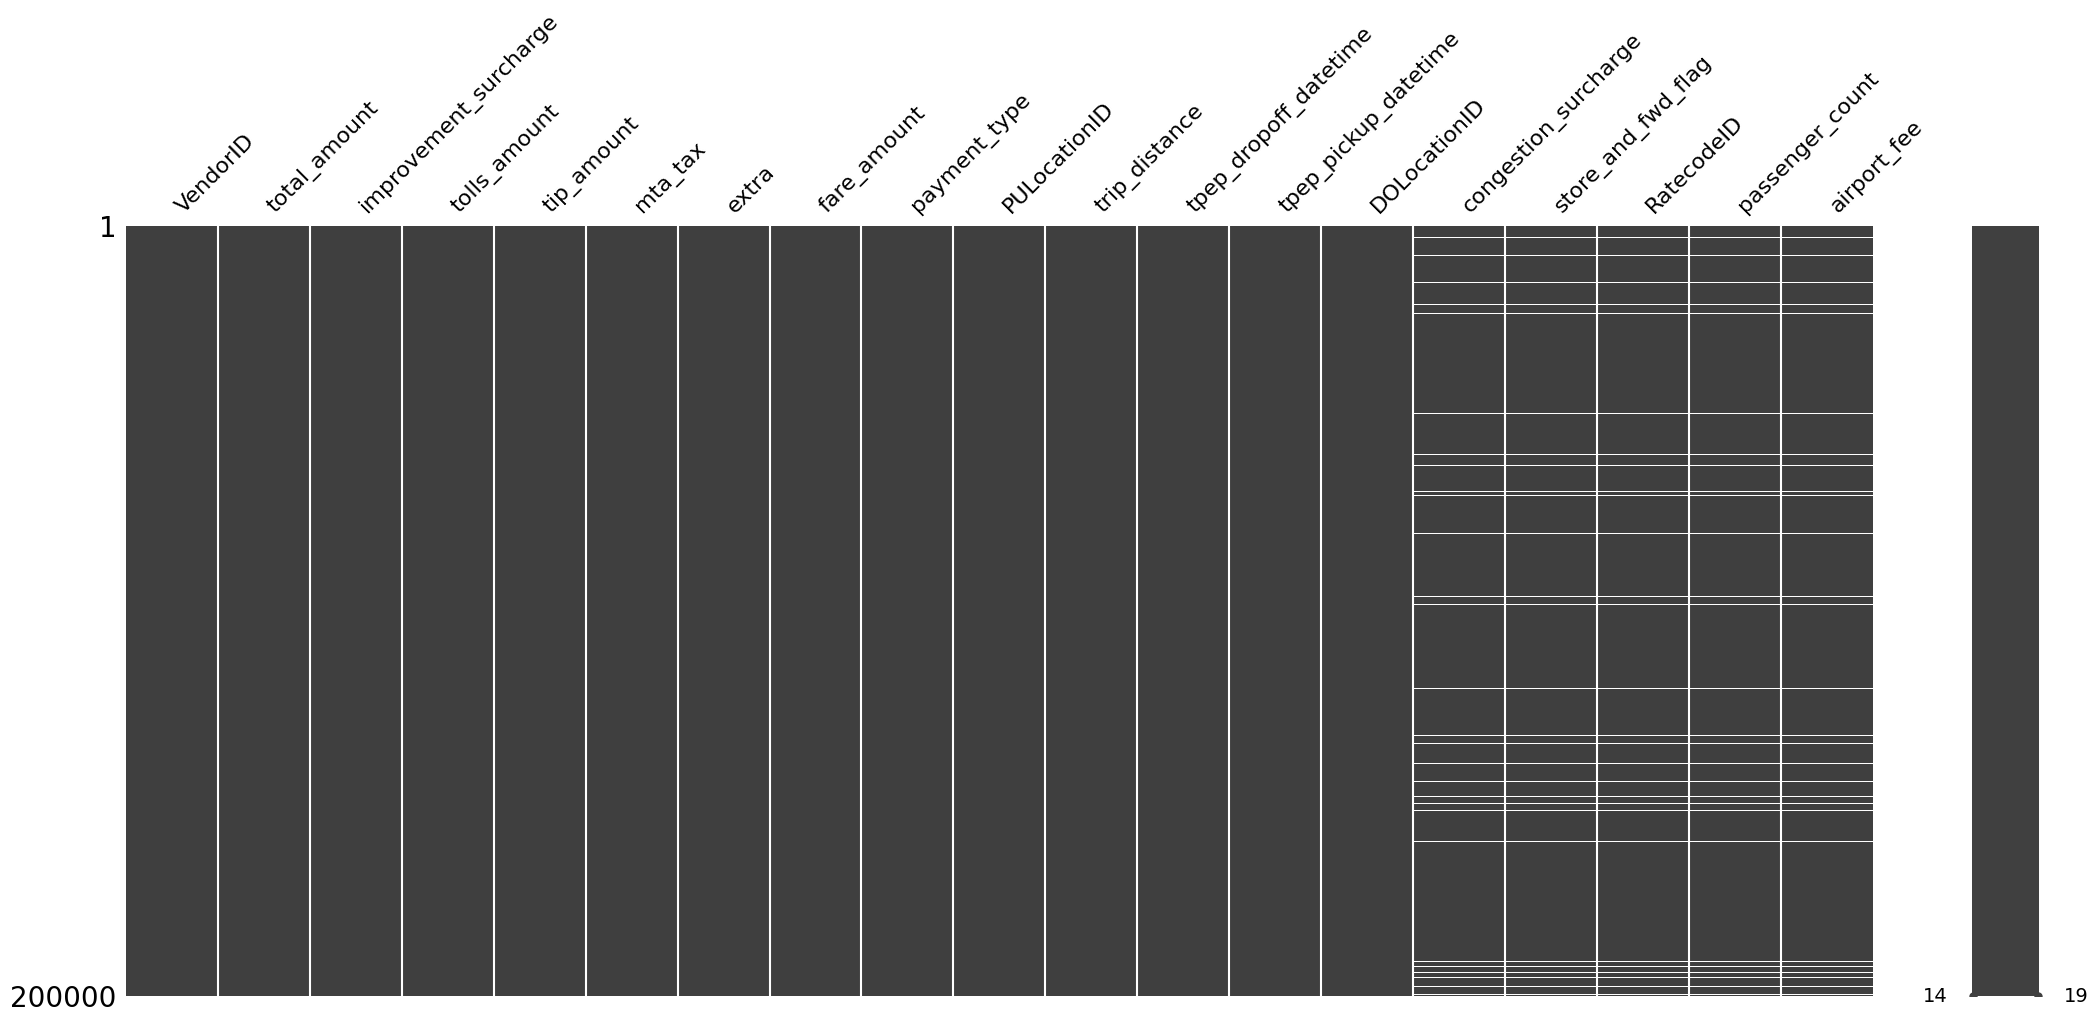

In [36]:
import missingno as msno
print(taxi_data.isnull().sum())
msno.matrix(taxi_data[taxi_data.isnull().sum().sort_values().index])

###Outliers and Patterns

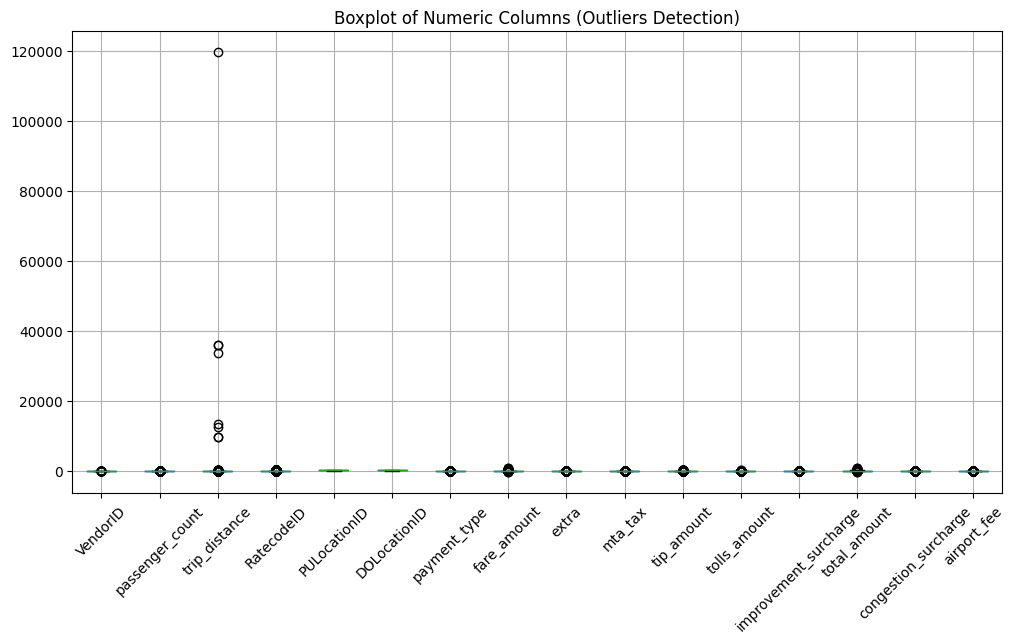

In [37]:
#highly inefficient - need to discuss about taking it out

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
taxi_data.select_dtypes(include=[np.number]).boxplot(rot=45)
plt.title("Boxplot of Numeric Columns (Outliers Detection)")
plt.show()

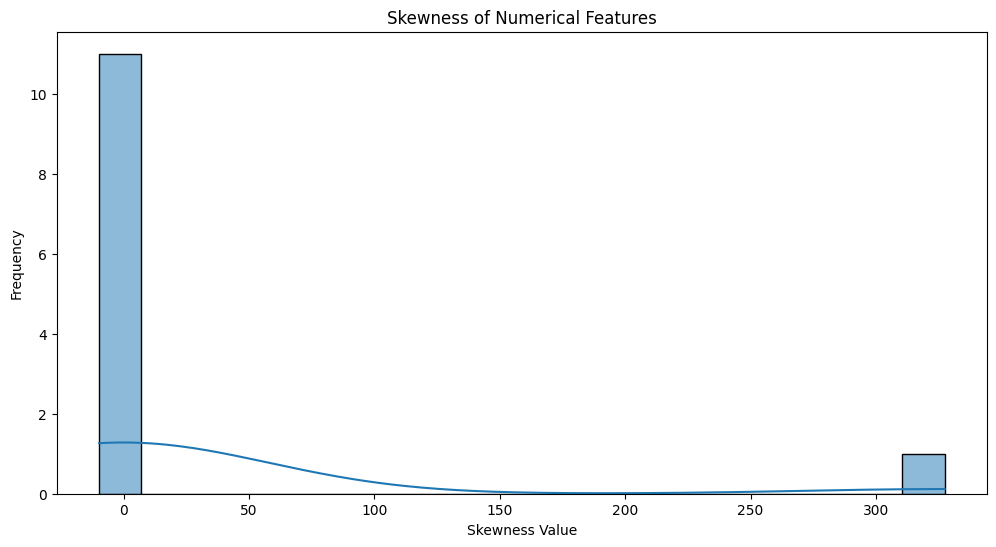

In [38]:
#skew chart to spot outliers

from scipy.stats import skew

skewness_values = taxi_data.select_dtypes(include=[np.number]).apply(skew)

plt.figure(figsize=(12, 6))
sns.histplot(skewness_values, bins=20, kde=True)
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness Value")
plt.ylabel("Frequency")
plt.show()

The skewness plot indicates that while most numerical features in the dataset have relatively low skewness, a few variables exhibit extreme right-skewness, with values exceeding 50 and even reaching above 300. This suggests that certain features have long-tailed distributions, meaning they contain a small number of extremely high values that significantly deviate from the rest of the data.

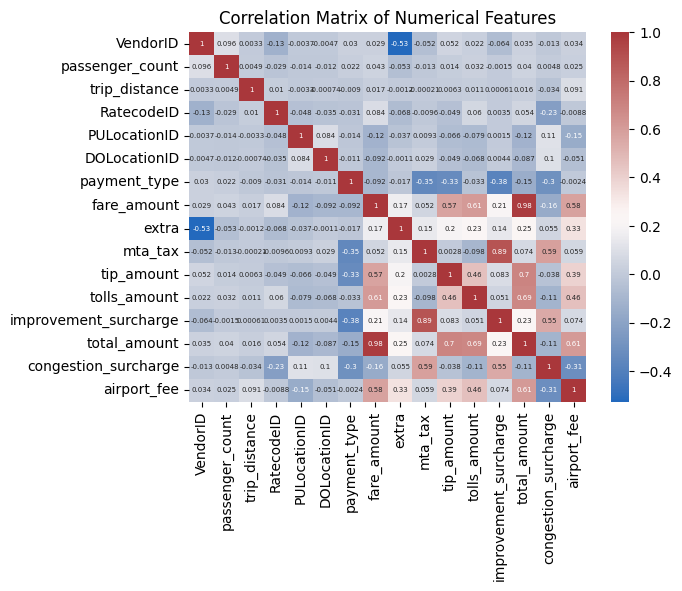

In [24]:
#check for patterns
import seaborn as sns
import matplotlib.pyplot as plt

corr = taxi_data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="vlag", annot_kws={"size": 5})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [25]:
#unusual patterns
num_cols = taxi_data.select_dtypes(include=['number'])
sns.pairplot(num_cols, corner=True)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x792262380900> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x792262309080> (for post_execute):


KeyboardInterrupt: 

## Preprocessing



The preprocessing of the dataset consisted of several key steps to ensure accuracy and consistency. An initial examination of missing data revealed that missing values were all located within the same rows. As a result, 6.8k rows with null values were removed. Columns were updated to their correct data types. This included converting certain fields from numerical to categorical variables to better represent vendor IDs, location IDs, and payment types. Additionally, timestamps for pickup and drop off times were put into their proper formats. To address inconsistencies, any instances where the passenger count was recorded as 0 were updated to 1, as a taxi ride should have at least one passenger. Rows where the recorded trip distance was zero were also removed as they were likely erroneous. Many rows contained negative values in fields such as fare amount, MTA tax, tip amount, toll amount, and total amount. Since these values should not be negative, only rows with positive amounts were retained. Lastly, a check for duplicate entries was performed, but none were found.

###Data Cleaning

In [55]:
#are all null columns the same null rows?
null_test = taxi_data[taxi_data['passenger_count'].isna()][['passenger_count','RatecodeID','store_and_fwd_flag','congestion_surcharge','airport_fee']]
print(null_test.isna().sum())

passenger_count         0
RatecodeID              0
store_and_fwd_flag      0
congestion_surcharge    0
airport_fee             0
dtype: int64


In [56]:
#drop null passengers to drop all other nulls
taxi_data.dropna(subset = ['passenger_count'],inplace = True)
taxi_data.isnull().sum()

#reset index
taxi_data.reset_index(drop = True,inplace = True)

In [57]:
#update columns to correct type (categories / timestamp)
change_categories = ['VendorID','RatecodeID','PULocationID','DOLocationID','payment_type']
taxi_data[change_categories] = taxi_data[change_categories].astype('category')

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188883 entries, 0 to 188882
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               188883 non-null  category      
 1   tpep_pickup_datetime   188883 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  188883 non-null  datetime64[ns]
 3   passenger_count        188883 non-null  float64       
 4   trip_distance          188883 non-null  float64       
 5   RatecodeID             188883 non-null  category      
 6   store_and_fwd_flag     188883 non-null  object        
 7   PULocationID           188883 non-null  category      
 8   DOLocationID           188883 non-null  category      
 9   payment_type           188883 non-null  category      
 10  fare_amount            188883 non-null  float64       
 11  extra                  188883 non-null  float64       
 12  mta_tax                188883 non-null  floa

In [58]:
#Convert passenger_count = 0 values to passenger_count = 1
taxi_data.loc[taxi_data['passenger_count'] == 0,'passenger_count'] = 1

#Drop rows where trip_distance = 0
taxi_data = taxi_data[taxi_data['trip_distance'] > 0]
taxi_data.reset_index(drop=True, inplace=True)

In [59]:
#Identify negative values in columns
neg_total_amt = taxi_data[taxi_data['total_amount'] < 0]['total_amount'].count()
neg_fare_amt = taxi_data[taxi_data['fare_amount'] < 0]['fare_amount'].count()
neg_extra = taxi_data[taxi_data['extra'] < 0]['extra'].count()
neg_mta_tax = taxi_data[taxi_data['mta_tax'] < 0]['mta_tax'].count()
neg_tip_amt = taxi_data[taxi_data['tip_amount'] < 0]['tip_amount'].count()
neg_tolls_amount = taxi_data[taxi_data['tolls_amount'] < 0]['tolls_amount'].count()
neg_improvement_surcharge = taxi_data[taxi_data['improvement_surcharge'] < 0]['improvement_surcharge'].count()
neg_congestion_surcharge = taxi_data[taxi_data['congestion_surcharge'] < 0]['congestion_surcharge'].count()
neg_airport_fee = taxi_data[taxi_data['airport_fee'] < 0]['airport_fee'].count()

print(f'neg_total_amt: {neg_total_amt}')
print(f'neg_fare_amt: {neg_fare_amt}')
print(f'neg_extra: {neg_extra}')
print(f'neg_mta_tax: {neg_mta_tax}')
print(f'neg_tip_amt: {neg_tip_amt}')
print(f'neg_tolls_amount: {neg_tolls_amount}')
print(f'neg_improvement_surcharge: {neg_improvement_surcharge}')
print(f'neg_congestion_surcharge: {neg_congestion_surcharge}')
print(f'neg_airport_fee: {neg_airport_fee}')

neg_total_amt: 0
neg_fare_amt: 0
neg_extra: 0
neg_mta_tax: 0
neg_tip_amt: 0
neg_tolls_amount: 0
neg_improvement_surcharge: 0
neg_congestion_surcharge: 0
neg_airport_fee: 0


In [60]:
#Filter negative values
taxi_data = taxi_data[taxi_data['total_amount'] > 0]
taxi_data.reset_index(drop=True, inplace=True)
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,188883,188883,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000,188883.000000
mean,2023-07-01 20:56:38.542489600,2023-07-01 21:14:01.442660352,1.391152,3.582175,19.608243,1.639531,0.496717,3.567819,0.588801,0.999671,28.740506,2.323846,0.142015
min,2008-12-31 23:34:45,2008-12-31 23:49:52,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2023-04-01 22:42:08.500000,2023-04-01 22:55:40,1.000000,1.080000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2023-06-25 19:52:34,2023-06-25 20:13:09,1.000000,1.800000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2023-10-05 18:31:02.500000,2023-10-05 18:48:40.500000,1.000000,3.400000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.600000,2.500000,0.000000
max,2023-12-31 23:52:35,2024-01-01 18:55:59,6.000000,9674.500000,637.900000,12.750000,0.800000,170.000000,47.750000,1.000000,656.150000,2.500000,1.750000
std,NaN,NaN,0.882411,31.796168,17.970805,1.825246,0.040442,3.980074,2.139402,0.015375,22.565650,0.639810,0.463714


In [63]:
#drop non-continuious numerical columns for model preperation
numeric_cols = taxi_data.select_dtypes(include=['number']).columns
all_numeric_cols = numeric_cols.tolist() + ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

taxi_dataset_num = taxi_data[all_numeric_cols]
taxi_dataset_num.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_datetime,tpep_dropoff_datetime
0,1.0,3.30,19.8,5.0,0.5,5.25,0.0,1.0,31.55,2.5,0.0,2023-10-26 18:47:26,2023-10-26 19:11:34
1,1.0,0.82,7.2,0.0,0.5,2.00,0.0,1.0,13.20,2.5,0.0,2023-08-29 12:10:22,2023-08-29 12:15:13
2,1.0,0.70,7.2,2.5,0.5,2.20,0.0,1.0,13.40,2.5,0.0,2023-10-12 08:51:29,2023-10-12 08:57:07
3,1.0,0.30,10.0,2.5,0.5,3.30,0.0,1.0,19.80,2.5,0.0,2023-09-14 17:06:53,2023-09-14 17:17:53
4,4.0,0.80,7.2,2.5,0.5,0.00,0.0,1.0,11.20,2.5,0.0,2023-05-06 14:11:12,2023-05-06 14:16:21


###Hyper-parameter Optimization - Feature Selection?

In [69]:
'''
1) Use PCA for feature selection

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Plot explained variance ratio
plt.figure(figsize=(8,5))
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Choose top contributing features
feature_importance = np.abs(pca.components_[0])  # First principal component
top_features = np.array(taxi_data.columns)[np.argsort(feature_importance)[-7:]]
print("Top 7 Features:", top_features)

- get the componenets that covers variance


2) Manually check variance

# Compute variance for each column
variance = taxi_data.var().sort_values(ascending=False)
print(variance)

# Select features with high variance
selected_features = variance[variance > variance.median()].index.tolist()
taxi_data_high_variance = taxi_data[selected_features]
'''

'\n1) Use PCA for feature selection\n\n# Apply PCA\npca = PCA()\npca.fit(scaled_data)\n\n# Plot explained variance ratio\nplt.figure(figsize=(8,5))\nplt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_), marker=\'o\', linestyle=\'--\')\nplt.xlabel(\'Number of Components\')\nplt.ylabel(\'Cumulative Explained Variance\')\nplt.title(\'PCA Explained Variance\')\nplt.show()\n\n# Choose top contributing features\nfeature_importance = np.abs(pca.components_[0])  # First principal component\ntop_features = np.array(taxi_data.columns)[np.argsort(feature_importance)[-7:]]\nprint("Top 7 Features:", top_features)\n\n- get the componenets that covers variance\n\n\n2) Manually check variance\n\n# Compute variance for each column\nvariance = taxi_data.var().sort_values(ascending=False)\nprint(variance)\n\n# Select features with high variance\nselected_features = variance[variance > variance.median()].index.tolist()\ntaxi_data_high_variance = taxi_data[selected_features]\n'

## Analysis
Outline the planned analysis tasks and methodologies.
- Tasks: List the specific tasks planned for the analysis.
- Analysis Methods: Detail the methods to be used (e.g., regression models, clustering, etc.).
- Justifications: Explain why these methods are suitable based on the dataset and goals.



We chose K-Means clustering to identify patterns in NYC taxi fare fluctuations and congestion pricing. Since our dataset does not have predefined labels, K-Means helps uncover hidden structures in the data, grouping trips with similar characteristics. Given the large volume of taxi trip data, K-Means is an efficient and scalable clustering algorithm.


The steps include:


1. Standardizing the Data: Ensuring all numeric variables have equal influence.
2. Applying PCA: Reducing dimensions while preserving variance.
3. Choosing Optimal Clusters: Using the Elbow Method.
4. K-Means Clustering: Assigning clusters and visualizing the results.

In [65]:
!pip install psynlig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.9/455.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12

In [67]:
#data cleaning process?
import pandas as pd

# Extract numerical features from datetime columns
taxi_dataset_num['pickup_hour'] = taxi_dataset_num['tpep_pickup_datetime'].dt.hour  # Hour of the day (0-23)
taxi_dataset_num['dropoff_hour'] = taxi_dataset_num['tpep_dropoff_datetime'].dt.hour

taxi_dataset_num['pickup_day'] = taxi_dataset_num['tpep_pickup_datetime'].dt.day  # Day of the month (1-31)
taxi_dataset_num['dropoff_day'] = taxi_dataset_num['tpep_dropoff_datetime'].dt.day

taxi_dataset_num['pickup_month'] = taxi_dataset_num['tpep_pickup_datetime'].dt.month  # Month (1-12)
taxi_dataset_num['dropoff_month'] = taxi_dataset_num['tpep_dropoff_datetime'].dt.month

taxi_dataset_num['pickup_weekday'] = taxi_dataset_num['tpep_pickup_datetime'].dt.weekday  # Day of the week (0=Monday, 6=Sunday)
taxi_dataset_num['dropoff_weekday'] = taxi_dataset_num['tpep_dropoff_datetime'].dt.weekday

# Drop original datetime columns since PCA only takes numeric data
taxi_dataset_num.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

<ipython-input-67-e8a0e2cca63a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_dataset_num['pickup_hour'] = taxi_dataset_num['tpep_pickup_datetime'].dt.hour  # Hour of the day (0-23)
<ipython-input-67-e8a0e2cca63a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_dataset_num['dropoff_hour'] = taxi_dataset_num['tpep_dropoff_datetime'].dt.hour
<ipython-input-67-e8a0e2cca63a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
taxi_dataset_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188883 entries, 0 to 188882
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   passenger_count        188883 non-null  float64
 1   trip_distance          188883 non-null  float64
 2   fare_amount            188883 non-null  float64
 3   extra                  188883 non-null  float64
 4   mta_tax                188883 non-null  float64
 5   tip_amount             188883 non-null  float64
 6   tolls_amount           188883 non-null  float64
 7   improvement_surcharge  188883 non-null  float64
 8   total_amount           188883 non-null  float64
 9   congestion_surcharge   188883 non-null  float64
 10  airport_fee            188883 non-null  float64
 11  pickup_hour            188883 non-null  int32  
 12  dropoff_hour           188883 non-null  int32  
 13  pickup_day             188883 non-null  int32  
 14  dropoff_day            188883 non-nu

###PCA

To improve clustering performance, we first applied Principal Component Analysis (PCA) to reduce dimensionality while retaining over 90% of the variance. This step ensures that K-Means operates effectively without being affected by high-dimensional noise.

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
normalized_data = sc.fit_transform(taxi_dataset_num)
normalized_data

array([[-4.43277705e-01, -8.87453207e-03,  1.06705027e-02, ...,
         1.00728046e+00, -1.05856722e-03, -2.80084215e-03],
       [-4.43277705e-01, -8.68715582e-02, -6.90468567e-01, ...,
         4.30108331e-01, -1.03973572e+00, -1.04011745e+00],
       [-4.43277705e-01, -9.06456078e-02, -6.90468567e-01, ...,
         1.00728046e+00, -1.05856722e-03, -2.80084215e-03],
       ...,
       [-4.43277705e-01, -7.86944506e-02, -6.90468567e-01, ...,
        -4.35649866e-01,  1.55695717e+00,  1.55317406e+00],
       [-4.43277705e-01, -8.59280458e-02, -7.29420737e-01, ...,
         1.00728046e+00, -5.20397146e-01, -5.21459144e-01],
       [-4.43277705e-01, -8.65570540e-02, -6.12564226e-01, ...,
        -1.01282200e+00,  5.18280012e-01,  5.15857460e-01]])

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA()

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(taxi_dataset_num.shape[1])]

transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.339142,-1.230376,0.129228,2.003161,1.107641,0.915869,0.070703,-0.020034,-0.470843,-0.425356,0.994523,0.777501,0.480318,-0.193630,-0.108838,0.002516,-0.000245,-0.014011,-0.000047
1,-1.184877,-0.955217,-1.073381,2.136727,-1.142016,-0.372742,-0.094115,-0.026322,-0.037560,-0.310977,-0.444299,-0.257840,-0.409464,0.143313,0.008111,-0.000847,0.000252,-0.000662,0.000012
2,-1.011044,0.979666,1.120749,0.799214,-1.150309,0.633993,-0.174917,0.009563,-0.274712,-0.217829,0.794647,0.182545,-0.121083,0.009127,-0.012853,-0.001935,0.000176,-0.042661,0.000012
3,-0.629583,-0.455323,1.068165,0.472647,0.431066,0.265998,-0.116768,-0.003800,-0.300954,-0.376502,0.334601,0.225536,-0.088508,-0.018877,0.009779,-0.002248,0.000056,0.034936,0.000065
4,-1.284392,1.246308,0.587330,-1.526737,1.006573,-0.334633,1.138340,0.092656,0.925545,2.306931,1.243379,-0.059359,0.012587,-0.030172,-0.008555,-0.001126,0.000130,-0.046788,0.000245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188878,-0.012675,-0.997357,-0.946941,-2.130695,0.493234,0.992641,0.118120,0.116213,-0.506575,-0.332081,1.027426,0.872609,0.250998,-0.105798,0.007484,-0.001879,-0.000130,-0.012411,0.000089
188879,-0.683660,0.340097,-1.300690,-1.902031,2.566242,-0.074043,-0.084627,0.053441,-0.270720,-0.643264,-0.456016,0.092366,-0.101084,0.065777,0.011652,-0.001945,0.000018,0.013874,0.000049
188880,-1.323878,0.696318,0.742785,-1.630733,2.357376,-0.146024,-0.412848,0.041419,-0.167969,-0.534707,-0.063774,-0.351295,-0.220083,0.076527,0.011261,-0.002066,0.000086,0.014266,0.000019
188881,-1.111480,-0.895536,2.599053,-0.366253,-0.080794,0.039513,-0.387531,0.017212,-0.111664,-0.257448,0.564646,-0.351104,-0.000401,0.001307,-0.101591,0.004499,-0.000262,0.034147,-0.000140


In [ ]:
model.explained_variance_ #ratio_

array([3.91858149e+00, 2.20661575e+00, 2.04558373e+00, 1.94873916e+00,
       1.80264587e+00, 1.11565115e+00, 1.02061269e+00, 9.99165111e-01,
       9.83420049e-01, 9.76152128e-01, 7.84136569e-01, 4.88144072e-01,
       3.26645455e-01, 3.00593917e-01, 7.48367149e-02, 5.59394357e-03,
       2.01343773e-03, 8.02210224e-04, 1.67155430e-04])

In [ ]:
components_df = pd.DataFrame(model.components_)

# Rename the columns
components_df.columns = taxi_dataset_num.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday
PC1,0.020968,0.085350,0.460887,0.172010,-0.189079,0.364187,0.397360,-0.001943,0.483623,-0.215576,0.371891,0.028135,0.029179,0.004138,0.004144,0.029934,0.029963,-0.030354,-0.030490
PC2,0.050453,0.013801,0.058472,-0.216266,-0.076232,0.008341,0.044678,0.002522,0.036719,-0.043992,-0.005354,-0.437926,-0.441803,-0.127529,-0.127564,0.073812,0.073830,0.502621,0.502838
PC3,0.002720,-0.009037,-0.023341,0.038503,0.024988,-0.005940,-0.024827,0.019010,-0.018090,0.030946,0.000106,0.150353,0.150004,-0.480187,-0.480205,0.491969,0.491965,-0.048129,-0.047932
PC4,0.005027,-0.005533,-0.010054,-0.038241,0.001490,-0.009990,-0.015327,0.026634,-0.013001,0.009176,-0.002916,-0.082732,-0.082995,0.490157,0.490123,0.500660,0.500657,-0.028087,-0.027538
PC5,0.087800,-0.003237,-0.012339,0.083258,0.031505,0.009355,-0.017119,0.004979,-0.002847,0.029988,0.018659,0.499275,0.493308,0.113261,0.113281,0.000006,0.000005,0.481939,0.481653
PC6,-0.233711,0.053960,-0.037779,0.490138,0.709191,0.107315,-0.088144,0.019348,0.017891,0.209554,0.300529,-0.123956,-0.132887,-0.000721,-0.000490,0.000517,0.000550,0.072699,0.073020
PC7,0.462686,0.119478,0.052542,-0.031525,0.040776,0.292519,0.173471,0.061340,0.121329,0.740283,-0.283765,-0.026163,-0.019316,0.000567,0.000475,-0.010590,-0.010677,-0.033813,-0.033450
PC8,0.002261,-0.059115,-0.010302,0.029557,-0.030613,-0.025338,0.000399,0.994798,-0.011967,-0.053851,0.015141,-0.003957,-0.004380,-0.004317,-0.004355,-0.022056,-0.022053,-0.000215,-0.000419
PC9,0.338308,0.859180,-0.002157,-0.112853,0.154273,-0.138644,-0.137534,0.040171,-0.046609,-0.227317,0.122027,0.013945,0.010155,-0.003013,-0.002948,-0.001071,-0.001100,-0.031557,-0.031873
PC10,0.765868,-0.462431,-0.009510,0.078739,0.204998,-0.106833,-0.093290,-0.046409,-0.030157,-0.252407,0.240571,-0.037376,-0.044482,-0.005380,-0.005303,-0.006101,-0.006168,-0.038667,-0.039020


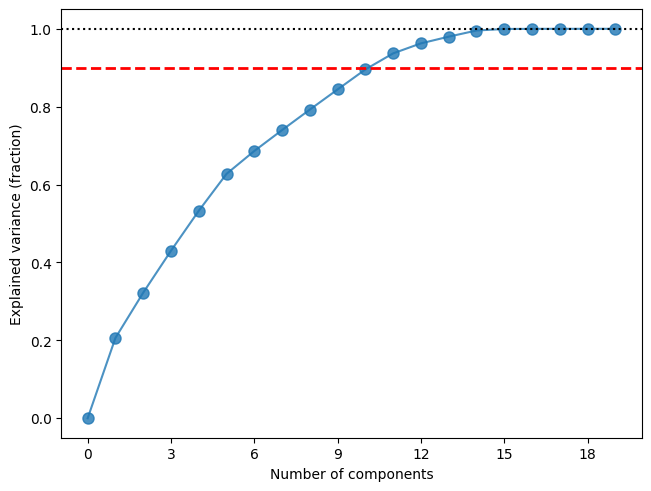

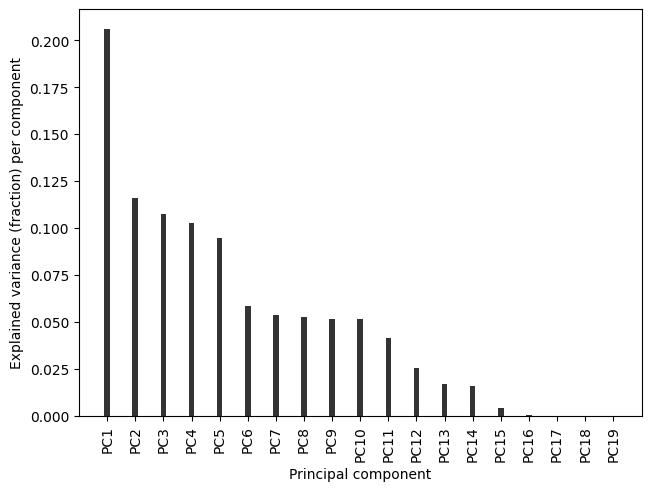

In [ ]:
# check variance to see how many features to keep
# 11 features explains 90% of variance

from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

# Let's add a line at an explained variance of 90%
ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

In [ ]:
#reconstruction error
from sklearn.metrics import mean_squared_error
import numpy as np

reconstructed_data = model.inverse_transform(transformed_data_df)

# Calculate reconstruction error (mean squared error)
reconstruction_errors = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))
# reconstruction_errors = np.mean((normalized_data - reconstructed_data) ** 2, axis=1) ### A second approach

###K-Means Clustering

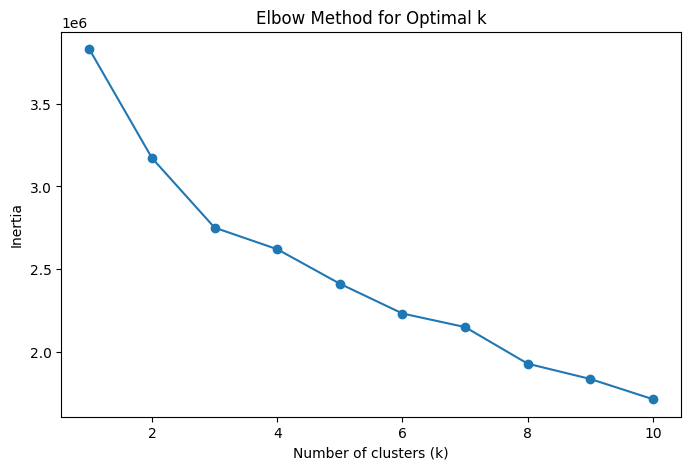

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'transformed_data_df' contains the PCA-transformed data
pca_data = transformed_data_df.values  # Convert to NumPy array

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Visualizing the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

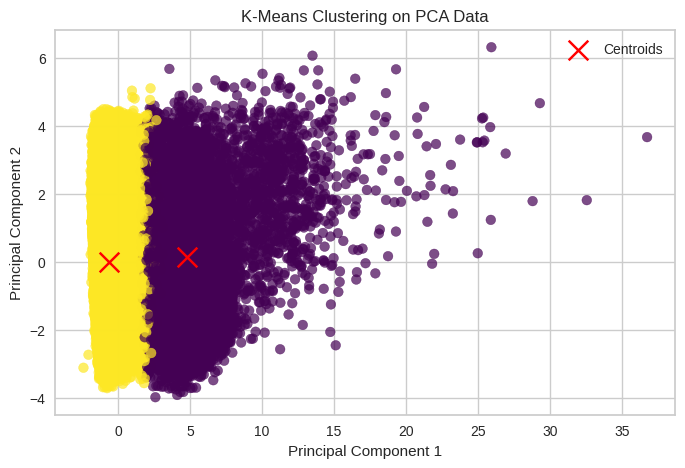

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the DataFrame
transformed_data_df["Cluster"] = clusters

# 2D visualization using the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Data')
plt.legend()
plt.show()

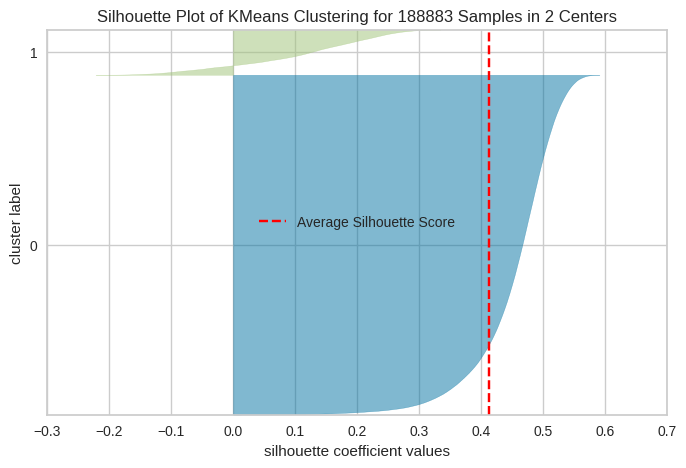

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 188883 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Set the number of clusters
optimal_k = 2

# Initialize and fit K-Means
kmeans_model = KMeans(n_clusters=optimal_k, init='random', random_state=42, n_init=10)

# Create a silhouette visualizer
plt.figure(figsize=(8, 5))
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', timings=False)

# Fit the visualizer with PCA-transformed data
visualizer.fit(pca_data)

# Show the visualization
visualizer.show()

The silhouette plot provides insights into how well the K-Means clustering algorithm performed in segmenting the data into two clusters. The average silhouette score is approximately 0.4, indicating moderate clustering quality.

Looking at the distribution of silhouette scores, we can observe that Cluster 0 (blue region) is more spread out, meaning that its data points have a wider range of silhouette values. This suggests that some points in this cluster are well-separated, while others may be closer to the boundary, potentially misclassified. In contrast, Cluster 1 (green region) appears more compact, implying that its points are more tightly grouped and better defined.

The presence of low and negative silhouette scores in some areas of the plot suggests that a portion of the data might be misclassified or that the two clusters are not perfectly distinct. This could indicate that the dataset naturally has more than two clusters or that certain data points belong to an overlapping region.

### Anomaly Detection

Number of detected anomalies: 1889


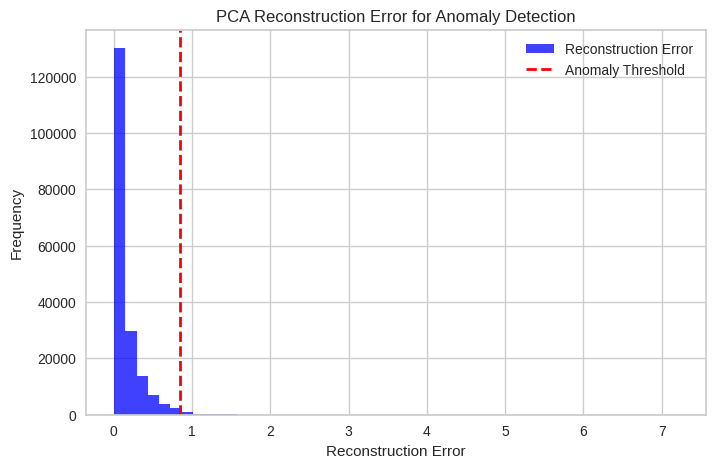

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(taxi_dataset_num)

# Apply PCA
n_components = 11  # Use same number of PCs as before
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(normalized_data)

# Reconstruct the data using inverse PCA
reconstructed_data = pca.inverse_transform(pca_data)

# Calculate reconstruction error
reconstruction_errors = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))

# Set threshold for anomalies (e.g., top 1% highest errors)
threshold = np.percentile(reconstruction_errors, 99)

# Identify anomalies
anomalies = reconstruction_errors > threshold

# Print number of anomalies
print(f"Number of detected anomalies: {np.sum(anomalies)}")

# Visualize distribution of errors
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.75, color='blue', label='Reconstruction Error')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('PCA Reconstruction Error for Anomaly Detection')
plt.legend()
plt.show()


The blue histogram illustrates the distribution of reconstruction errors, where most data points have low reconstruction error, meaning they are well-represented by PCA. However, a small number of points exhibit high reconstruction errors, which may indicate potential anomalies. The red dashed line represents the anomaly threshold, typically set at a specific percentile (e.g., the top 1% of errors). Data points to the right of this threshold are considered anomalies.

In terms of anomaly detection, most data points are reconstructed well and classified as normal. However, a few points exceed the anomaly threshold, suggesting they are outliers. These anomalies could represent unusual taxi rides (such as extreme fares, very long distances, or unusual pickup/drop-off locations), errors in the dataset (like missing or incorrect data), or genuine rare events (such as emergency rides or special service requests).

Number of detected anomalies: 1889


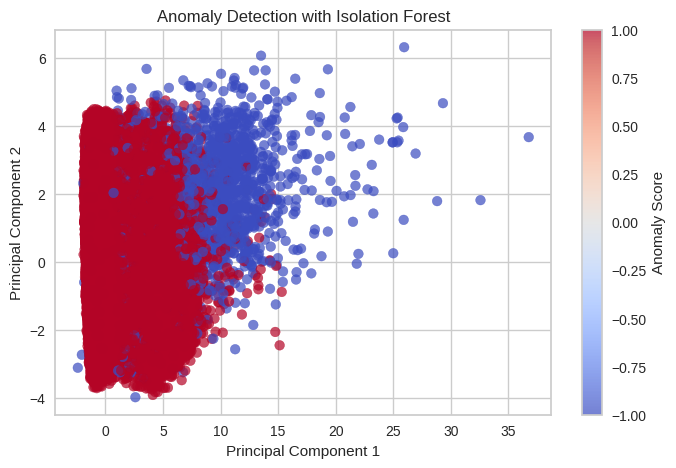

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
# "contamination" is the expected proportion of anomalies (1% here)

# Fit model on PCA data
iso_forest.fit(pca_data)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomaly_labels = iso_forest.predict(pca_data)

# Count anomalies
print(f"Number of detected anomalies: {np.sum(anomaly_labels == -1)}")

# Visualize anomalies
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=anomaly_labels, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection with Isolation Forest')
plt.colorbar(label='Anomaly Score')
plt.show()
